In [96]:
import pandas as pd
import numpy as np

In [97]:
data = pd.read_csv('apto_vmariana.csv', sep=';', encoding = 'utf-8-sig')

In [98]:
quarto_1 = data[data['Quartos'] == '1'].drop(['Description', 'Date', 'Hour', 'Tipo', 'Vagas na garagem', 'Detalhes do imóvel', 'Detalhes do condominio', 'Município'], axis=1)
quarto_2 = data[data['Quartos'] == '2'].drop(['Description', 'Date', 'Hour', 'Tipo', 'Vagas na garagem', 'Detalhes do imóvel', 'Detalhes do condominio', 'Município'], axis=1)

In [99]:
quarto_1['Price'].replace(to_replace='None', value=0, inplace=True)
quarto_1['Price_'] = pd.to_numeric(quarto_1['Price'], downcast="float")

quarto_2['Price'].replace(to_replace='None', value=0, inplace=True)
quarto_2['Price_'] = pd.to_numeric(quarto_2['Price'], downcast="float")


In [100]:
quarto_1['Condomínio_'] = quarto_1['Condomínio'].str[3:]
quarto_1['Condomínio_'].replace(to_replace='None', value=0, inplace=True)
quarto_1['Condomínio_'].replace(to_replace='nan', value=0, inplace=True)
quarto_1['Condomínio_'] = quarto_1['Condomínio_'].str.replace('\.', '').astype(float)

quarto_2['Condomínio_'] = quarto_2['Condomínio'].str[3:]
quarto_2['Condomínio_'].replace(to_replace='None', value=0, inplace=True)
quarto_2['Condomínio_'].replace(to_replace='nan', value=0, inplace=True)
quarto_2['Condomínio_'] = quarto_2['Condomínio_'].str.replace('\.', '').astype(float)

C:\Users\PV\AppData\Local\Temp/ipykernel_10220/3203869030.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  quarto_1['Condomínio_'] = quarto_1['Condomínio_'].str.replace('\.', '').astype(float)
C:\Users\PV\AppData\Local\Temp/ipykernel_10220/3203869030.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  quarto_2['Condomínio_'] = quarto_2['Condomínio_'].str.replace('\.', '').astype(float)


In [101]:
quarto_1['total_price'] = quarto_1['Price_'] + quarto_1['Condomínio_']

quarto_2['total_price'] = quarto_2['Price_'] + quarto_2['Condomínio_']

In [102]:
quarto_1['total_price'].describe()

count      1037.000000
mean       3259.557377
std       10842.516921
min        1100.000000
25%        2270.000000
50%        2800.000000
75%        3429.000000
max      350830.000000
Name: total_price, dtype: float64

In [106]:
from scipy import stats

q1 = quarto_1[(np.abs(stats.zscore(quarto_1['Price_'])) < 3)]

q2 = quarto_2[(np.abs(stats.zscore(quarto_2['Price_'])) < 3)]


In [108]:
q22 = q2[(np.abs(stats.zscore(q2['Price_'])) < 3)]


<AxesSubplot:ylabel='Frequency'>

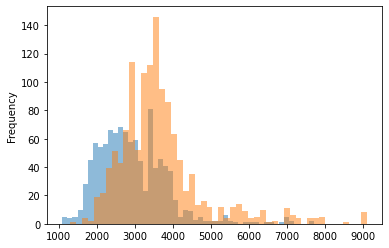

In [109]:
q1['total_price'].plot.hist(bins=50, alpha=0.5)
q22['total_price'].plot.hist(bins=50, alpha=0.5)

In [112]:
q1['total_price'].describe()

count    1036.000000
mean     2924.064672
std       917.105019
min      1100.000000
25%      2268.250000
50%      2800.000000
75%      3429.000000
max      7700.000000
Name: total_price, dtype: float64

In [113]:
q22['total_price'].describe()

count    1283.000000
mean     3659.108340
std      1139.040321
min      1300.000000
25%      2950.000000
50%      3485.000000
75%      3973.500000
max      9090.000000
Name: total_price, dtype: float64